## practical nural network

In [1]:
import numpy as np
import tensorflow as tf

/home/pirate/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
## how many feature the data has
n_features = 10
## how many nurons in the layers
n_dense_nurons  =3
# placeholder create
x = tf.placeholder(tf.float32,(None,n_features))## none is for shape 
                                            ## and n_features is for the num of feature
                                            ## this is not compulsury to write


In [3]:
## now we need to add weight/Variable in tensorflow
## we select random number as a Weight
## and we need to add bias term 
W = tf.Variable(tf.random_normal([n_features,n_dense_nurons]))
## n_featture is column of 2D array
## and n_dense_nurons is the row
## relatablke to the theory


Instructions for updating:
Colocations handled automatically by placer.


In [4]:
##and we add the 1 as a bias term so we have to add a one matrix
b = tf.Variable(tf.random_normal([n_dense_nurons]))
## remember the array you creating must be like this matrix multiplication
## like this matrix column has to match other number of rows

In [5]:
### now we need  fnctionality
### and it will be a matrix multiplication
xW = tf.matmul(x,W)
z=tf.add(xW,b)


In [6]:
## now we need the activation function
##we use the sigmoid function
a=tf.sigmoid(z)

In [7]:
## we have to initialize the variable
init =tf.global_variables_initializer()

In [8]:
with tf.Session() as sess:
    sess.run(init)## init the system
    ## now we need to feed the data to a place holder
    layer_out = sess.run(a,feed_dict={x:np.random.random([1,n_features])})
    #np.random.random([1,10])  ## that mes the first row of the whole feature
    ## an 1D array of 10 number

In [9]:
print(layer_out)

[[0.02852437 0.9089444  0.4444624 ]]


In [10]:
## we do not add cost function
## case the dense layer has three nurons we got three result
## and because of the sigmoid function we get the value 0-1

# SIMPLE REGRESSION MODEL

In [11]:
x_data = np.linspace(0,10,10)+np.random.uniform(-1.5,1.5,10)
## value linearly space between 0 to 10 
## and we add noise to that just we add random that either add or subtract the number

In [12]:
print (x_data)

[-0.59706618  1.59013983  0.75690359  2.47174862  5.69595474  4.30654718
  5.36828406  7.81448107  9.16435954 10.1246275 ]


In [13]:
y_label = np.linspace(0,10,10)+np.random.uniform(-1.5,1.5,10)
## x data and u data for plotting

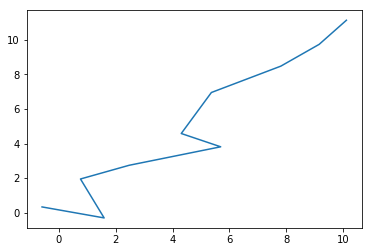

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x_data,y_label)


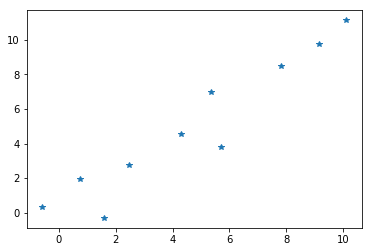

In [15]:
plt.plot(x_data,y_label,'*')

In [16]:
## y=mx+b this will be the regression algo
m=tf.Variable(0.44)  ## m in the equation is a weight
                 ## we set a value for that
b=tf.Variable(0.87) ## is the bias

## lets make the cost function

In [17]:
error = 0
actual_pred=y_label
for x,y in zip(x_data,y_label): # this zip function create pair of x and y tuple 
    y_pred_value = m*x + b #this is just a linear equation
    ## but the m and b is random we need to adjust as like the regression
    ## to get a fitted line so we first count the error
    
    error +=(actual_pred-y_pred_value)**2 ##we make it bigger for calculation with
                                          ## square
    

#### ok cost function is ready now we need to optimize/adjust
## we optimize with gradient decent




In [18]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
## learning rate is vvi cause if it is very high it overlook significant things(overshoot problem)
## if it is very low its gonna take forever


In [19]:
train = optimizer.minimize(error)

## if you dont optimize and reduce the error then you are not doing learning you are just applying a equation

In [20]:
## init this thing
init = tf.global_variables_initializer()

In [21]:
## running 
with tf.Session() as sess:
    sess.run(init)
    train_steps = 1 ## how many times we train /epoch
    
    for i in range(train_steps):
        ## remember tensorflow keeps record even if you run
        ## one command more than one time
        sess.run(train)
        #final_slope = m final_intercept = b after optimization
        final_slope,final_intercept = sess.run([m,b])

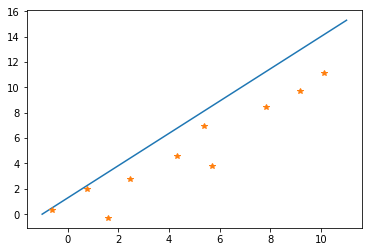

In [22]:
## now create the test dataset
x_test = np.linspace(-1,11,10) ## 10 data between -1 to 11
### y=mx+b
y_pred_plot = final_slope*x_test+final_intercept 
plt.plot(x_test,y_pred_plot)
plt.plot(x_data,y_label,'*')

## now we can improve it my doing more epoch

In [27]:
np.random.randint(3,size=8)

array([1, 0, 2, 2, 0, 2, 2, 2])